# Пропущенные значения

`.isna()` - проверяет наличие NaN

`.fillna()` - заполняет пустые ячейки в столбце тем, что указано в скобках

`.dropna()` - удаляет строки, в которых NaN

In [1]:
import pandas as pd
import numpy as np

bikes = pd.read_csv('data/BikesDataVars.csv')
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Windy,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,False,False,257,0,Freezing,False,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,False,False,219,0,Freezing,False,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,False,False,162,0,Freezing,False,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,False,False,148,1,Freezing,False,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,False,False,97,0,Freezing,False,0


In [2]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  8760 non-null   object 
 1   Hour                  8760 non-null   int64  
 2   Temperature           8581 non-null   float64
 3   Humidity              8760 non-null   int64  
 4   Wind speed            8760 non-null   float64
 5   Rainfall              8760 non-null   float64
 6   Snowfall              8760 non-null   float64
 7   Seasons               8760 non-null   object 
 8   Holiday               8760 non-null   bool   
 9   Functioning Day       8760 non-null   bool   
 10  Rental Count          8760 non-null   int64  
 11  Normal Humidity       8760 non-null   int64  
 12  Temperature Category  8581 non-null   object 
 13  Windy                 8760 non-null   bool   
 14  Good Weather          8760 non-null   int64  
dtypes: bool(3), float64(4

### Сколько пропущенных значений?

In [3]:
bikes.isna().sum()

Date                      0
Hour                      0
Temperature             179
Humidity                  0
Wind speed                0
Rainfall                  0
Snowfall                  0
Seasons                   0
Holiday                   0
Functioning Day           0
Rental Count              0
Normal Humidity           0
Temperature Category    179
Windy                     0
Good Weather              0
dtype: int64

In [6]:
bikes[bikes['Temperature'].isna()].shape

(179, 15)

In [12]:
# тип numpy.float64 и у чисел, и у nan
bikes.iloc[40]['Temperature'], type(bikes.iloc[40]['Temperature'])

(6.4, numpy.float64)

In [13]:
# тип numpy.float64 и у чисел, и у nan
bikes.iloc[39]['Temperature'], type(bikes.iloc[39]['Temperature'])

(nan, numpy.float64)

In [10]:
# количество строчек без nan в температуре
bikes[bikes['Temperature'].notna()].shape

(8581, 15)

In [11]:
# количество строчек, если выкинуть строчки с nan в температуре
[bikes.dropna(subset=['Temperature'])].shape

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Windy,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,False,False,257,0,Freezing,False,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,False,False,219,0,Freezing,False,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,False,False,162,0,Freezing,False,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,False,False,148,1,Freezing,False,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,False,False,97,0,Freezing,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,19,4.2,34,2.6,0.0,0.0,Autumn,False,False,644,0,Chilly,False,0
8756,2018-11-30,20,3.4,37,2.3,0.0,0.0,Autumn,False,False,359,0,Chilly,False,0
8757,2018-11-30,21,2.6,39,0.3,0.0,0.0,Autumn,False,False,1236,0,Chilly,False,0
8758,2018-11-30,22,2.1,41,1.0,0.0,0.0,Autumn,False,False,628,1,Chilly,False,0


Хочу столбец, где все nan поменяли на числа.

Как написать условие "если nan, то ставь 42"?

### Способ 1 (нам знакомый)

In [11]:
if bikes[bikes['Temperature'].isna()]['Temperature'][39] == nan:
    print('+')

NameError: name 'nan' is not defined

In [12]:
if (bikes[bikes['Temperature'].isna()]['Temperature'][39]).isna():
    print('+')

AttributeError: 'numpy.float64' object has no attribute 'isna'

А вот так работает:

In [13]:
bikes['Temperature_2'] = bikes['Temperature']
bikes.loc[bikes['Temperature_2'].isna(),'Temperature_2'] = 42
bikes.iloc[35:41]

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Windy,Good Weather,Temperature_2
35,2017-12-02,11,1.9,49,1.8,0.0,0.0,Winter,False,False,419,1,Chilly,False,0,1.9
36,2017-12-02,12,4.3,41,1.3,0.0,0.0,Winter,False,False,803,1,Chilly,False,0,4.3
37,2017-12-02,13,6.0,36,1.8,0.0,0.0,Winter,False,False,659,0,Chilly,False,0,6.0
38,2017-12-02,14,7.3,35,1.3,0.0,0.0,Winter,False,False,1054,0,Chilly,False,0,7.3
39,2017-12-02,15,NaN,41,2.3,0.0,0.0,Winter,False,False,688,1,NaN,False,0,42.0
40,2017-12-02,16,6.4,48,2.6,0.0,0.0,Winter,False,False,592,1,Chilly,False,0,6.4


### Способ 2 - fillna()

In [14]:
bikes['Temperature_3'] = bikes['Temperature'].fillna(42)

In [15]:
bikes.iloc[37:41]

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Windy,Good Weather,Temperature_3
37,2017-12-02,13,6.0,36,1.8,0.0,0.0,Winter,False,False,659,0,Chilly,False,0,6.0
38,2017-12-02,14,7.3,35,1.3,0.0,0.0,Winter,False,False,1054,0,Chilly,False,0,7.3
39,2017-12-02,15,NaN,41,2.3,0.0,0.0,Winter,False,False,688,1,NaN,False,0,42.0
40,2017-12-02,16,6.4,48,2.6,0.0,0.0,Winter,False,False,592,1,Chilly,False,0,6.4


Создадим столбик с медианой вместо пропусков

In [16]:
bikes['Temperature_Median'] = bikes['Temperature'].fillna(bikes['Temperature'].median())

In [17]:
bikes[bikes['Temperature'].isna()].head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Windy,Good Weather,Temperature_2,Temperature_3,Temperature_Median
39,2017-12-02,15,NaN,41,2.3,0.0,0.0,Winter,False,False,688,1,NaN,False,0,42.0,42.0,13.7
50,2017-12-03,2,NaN,79,1.4,0.0,0.0,Winter,False,False,262,0,NaN,False,0,42.0,42.0,13.7
64,2017-12-03,16,NaN,77,1.6,0.0,0.0,Winter,False,False,577,0,NaN,False,0,42.0,42.0,13.7
105,2017-12-05,9,NaN,31,1.3,0.0,0.0,Winter,False,False,313,0,NaN,False,0,42.0,42.0,13.7
151,2017-12-07,7,NaN,93,0.5,0.0,0.9,Winter,False,False,269,0,NaN,False,0,42.0,42.0,13.7


Можно заполнить, например, рандомным значением из существующих

In [22]:
# можно рандомом выбирать число из столбика с температурой
np.random.choice(bikes['Temperature'].dropna())

18.3

In [17]:
bikes['Temperature_Random'] = bikes['Temperature'].fillna(np.random.choice(bikes['Temperature'].dropna()))
bikes[bikes['Temperature'].isna()].head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Windy,Good Weather,Temperature_3,Temperature_Median,Temperature_Random
39,2017-12-02,15,NaN,41,2.3,0.0,0.0,Winter,False,False,688,1,NaN,False,0,42.0,13.7,22.0
50,2017-12-03,2,NaN,79,1.4,0.0,0.0,Winter,False,False,262,0,NaN,False,0,42.0,13.7,22.0
64,2017-12-03,16,NaN,77,1.6,0.0,0.0,Winter,False,False,577,0,NaN,False,0,42.0,13.7,22.0
105,2017-12-05,9,NaN,31,1.3,0.0,0.0,Winter,False,False,313,0,NaN,False,0,42.0,13.7,22.0
151,2017-12-07,7,NaN,93,0.5,0.0,0.9,Winter,False,False,269,0,NaN,False,0,42.0,13.7,22.0


In [18]:
bikes.shape

(8760, 18)

In [19]:
# сделали 8760 рандомных температур, теперь, если nan, можем использовать соответствующую рандомную
temps = np.random.choice(bikes['Temperature'].dropna(), 8760)
temps[:100]

array([ 15.6,  10.8,  18.4,  25.9,   2.7,  -2.5,  29.3,  27.6,  11.7,
         9.6,  23.3,  25. ,  20.4,  10.5,   6.3,  21.3,   7.5,   1.9,
        21.3,   4.7,  19.8,  20.5,   9.3,  29.3,   7.6,   8.9,  33.6,
        13.8,  20.3,  11.1,  21.7,  -7.6,   1.1,   0.8,   9.3,  17.6,
        12.8,  19.8, -11.6,  -5.7,   9.2,   6.4,  25.7,  25.3,  26.9,
         8.7,  21.7,  28.8,   7.4,   4.7,  34.7,  22.5,  28.2,   0.7,
        -1.7,   2. , -10.7,  -6.3,  12.1,  26.4,   3.6,  28.2,  13.6,
       -12. ,  32.4,   9. ,  31.9,   8.1,   0. ,   1.6,  21.1,  16.4,
        20.3,  29.4,  26.5,  -9.5,   8.5,  -7.4,  22.2,  -4.2,  31.5,
        20.8,  21.3,  -6.5,  23.9,  15. ,  25.2,  11.6,  18.3,  30.5,
         6.6,  -3.2,  25.6,  14.9,  18.5,  14.1,  13.4,  21. ,   5.8,
        16.6])

In [20]:
bikes['Temperature_Random'] = bikes['Temperature'].fillna(pd.Series(temps))

In [21]:
bikes[bikes['Temperature'].isna()].head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Windy,Good Weather,Temperature_3,Temperature_Median,Temperature_Random
39,2017-12-02,15,NaN,41,2.3,0.0,0.0,Winter,False,False,688,1,NaN,False,0,42.0,13.7,-5.7
50,2017-12-03,2,NaN,79,1.4,0.0,0.0,Winter,False,False,262,0,NaN,False,0,42.0,13.7,34.7
64,2017-12-03,16,NaN,77,1.6,0.0,0.0,Winter,False,False,577,0,NaN,False,0,42.0,13.7,32.4
105,2017-12-05,9,NaN,31,1.3,0.0,0.0,Winter,False,False,313,0,NaN,False,0,42.0,13.7,-9.6
151,2017-12-07,7,NaN,93,0.5,0.0,0.9,Winter,False,False,269,0,NaN,False,0,42.0,13.7,18.6


In [22]:
bikes.iloc[38:42]

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Windy,Good Weather,Temperature_3,Temperature_Median,Temperature_Random
38,2017-12-02,14,7.3,35,1.3,0.0,0.0,Winter,False,False,1054,0,Chilly,False,0,7.3,7.3,7.3
39,2017-12-02,15,NaN,41,2.3,0.0,0.0,Winter,False,False,688,1,NaN,False,0,42.0,13.7,-5.7
40,2017-12-02,16,6.4,48,2.6,0.0,0.0,Winter,False,False,592,1,Chilly,False,0,6.4,6.4,6.4
41,2017-12-02,17,6.0,51,2.5,0.0,0.0,Winter,False,False,141,1,Chilly,False,0,6.0,6.0,6.0


Но суперспособ - посмотреть среднюю или медианную температуру за неделю и поставить её вместо nan

In [23]:
bikes['Date'] = pd.to_datetime(bikes['Date'], dayfirst=True)

In [24]:
bikes.groupby([bikes['Date'].dt.isocalendar().week, 'Hour'])['Temperature'].median()

week  Hour
1     0      -4.3
      1      -4.8
      2      -5.3
      3      -5.5
      4      -5.1
             ... 
52    19     -0.4
      20     -1.0
      21     -1.6
      22     -1.7
      23     -1.0
Name: Temperature, Length: 1248, dtype: float64

In [25]:
temp_medians = bikes.groupby([bikes['Date'].dt.isocalendar().week, 'Hour'])['Temperature'].transform('median')

In [26]:
bikes['Temperature_Median_Group'] = bikes['Temperature'].fillna(pd.Series(temp_medians))
bikes[bikes['Temperature'].isna()].head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Windy,Good Weather,Temperature_3,Temperature_Median,Temperature_Random,Temperature_Median_Group
39,2017-12-02,15,NaN,41,2.3,0.0,0.0,Winter,False,False,688,1,NaN,False,0,42.0,13.7,-5.7,7.50
50,2017-12-03,2,NaN,79,1.4,0.0,0.0,Winter,False,False,262,0,NaN,False,0,42.0,13.7,34.7,1.35
64,2017-12-03,16,NaN,77,1.6,0.0,0.0,Winter,False,False,577,0,NaN,False,0,42.0,13.7,32.4,7.20
105,2017-12-05,9,NaN,31,1.3,0.0,0.0,Winter,False,False,313,0,NaN,False,0,42.0,13.7,-9.6,-2.40
151,2017-12-07,7,NaN,93,0.5,0.0,0.9,Winter,False,False,269,0,NaN,False,0,42.0,13.7,18.6,-4.85


In [27]:
bikes.iloc[38:42]

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Windy,Good Weather,Temperature_3,Temperature_Median,Temperature_Random,Temperature_Median_Group
38,2017-12-02,14,7.3,35,1.3,0.0,0.0,Winter,False,False,1054,0,Chilly,False,0,7.3,7.3,7.3,7.3
39,2017-12-02,15,NaN,41,2.3,0.0,0.0,Winter,False,False,688,1,NaN,False,0,42.0,13.7,-5.7,7.5
40,2017-12-02,16,6.4,48,2.6,0.0,0.0,Winter,False,False,592,1,Chilly,False,0,6.4,6.4,6.4,6.4
41,2017-12-02,17,6.0,51,2.5,0.0,0.0,Winter,False,False,141,1,Chilly,False,0,6.0,6.0,6.0,6.0


# Визуализация данных

In [28]:
import matplotlib.pyplot as plt
bikes = pd.read_pickle('Data/BikesDataImputed.pkl')
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


In [29]:
# среднемесячная температура
month_weather = bikes.groupby(bikes['Date'].dt.month)['Temperature'].mean()
month_weather

Date
1     -3.957460
2     -1.677009
3      8.049597
4     12.970278
5     18.129368
6     23.134375
7     27.766062
8     28.719556
9     21.490208
10    13.095161
11     7.785069
12    -1.932594
Name: Temperature, dtype: float64

<BarContainer object of 12 artists>

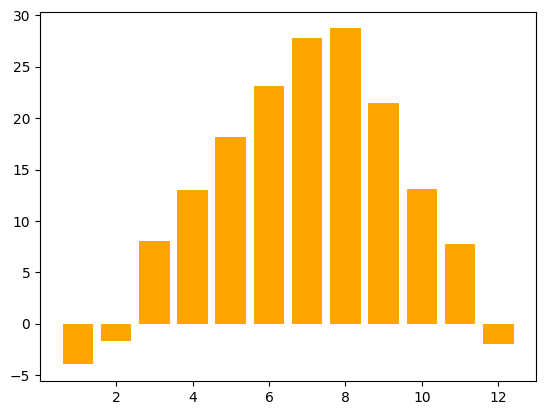

In [30]:
plt.bar(month_weather.index, month_weather, color='orange')

Text(0.5, 0.98, 'Среднемесячная температура')

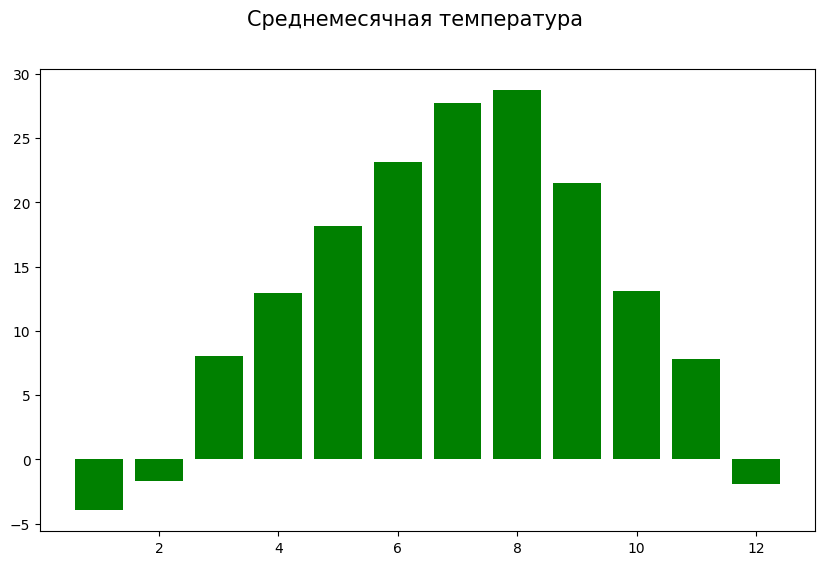

In [31]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(month_weather.index, month_weather, color = 'green')
fig.suptitle('Среднемесячная температура', fontsize=15)

In [33]:
# сгруппировали по неделям кол-во велосипедов
bikes_sum = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Rental Count'].sum()
bikes_sum

week
1      39441
2      30871
3      42193
4      23079
5      28415
6      33259
7      32139
8      50136
9      52958
10     77316
11     90547
12     79109
13    118031
14     97000
15     98468
16    142918
17    141147
18    146127
19    136607
20    142346
21    189749
22    210326
23    211869
24    220392
25    213553
26    146455
27    183652
28    154848
29    172636
30    163447
31    135086
32    147911
33    166679
34    152282
35    138529
36    191800
37    186208
38    103925
39    124820
40     99622
41    159527
42    185695
43    141509
44    123557
45     66682
46    142787
47    103454
48    107727
49     48680
50     40147
51     31938
52     34460
Name: Rental Count, dtype: int64

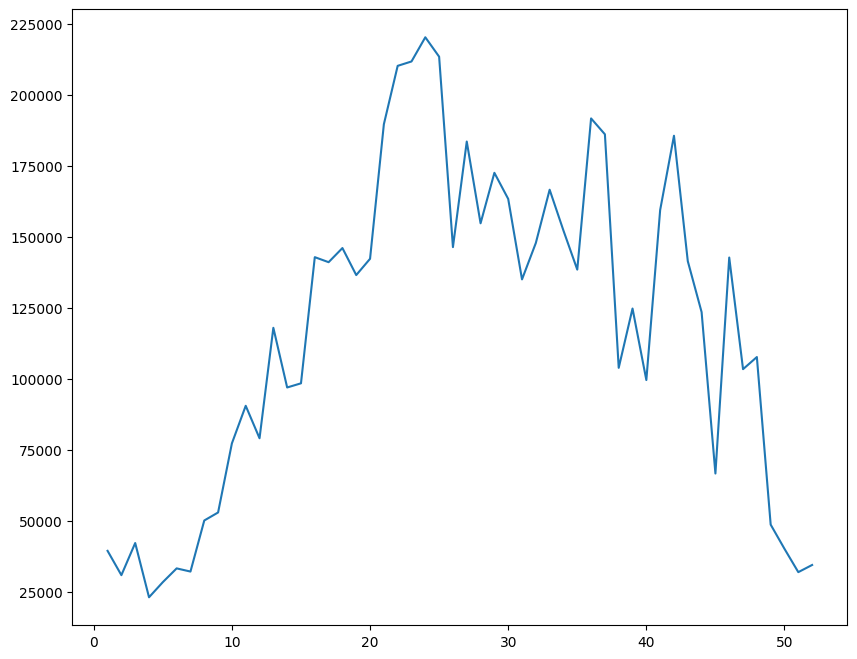

In [34]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(bikes_sum)

In [35]:
# а теперь по сезону и дате
bikes.groupby(['Seasons', 'Date'])['Rental Count'].sum()

Seasons  Date      
Autumn   2018-09-01    25495
         2018-09-02    33943
         2018-09-03    10753
         2018-09-04    31363
         2018-09-05    34816
                       ...  
Winter   2018-02-24     6286
         2018-02-25     5780
         2018-02-26     9133
         2018-02-27     8923
         2018-02-28     3663
Name: Rental Count, Length: 365, dtype: int64

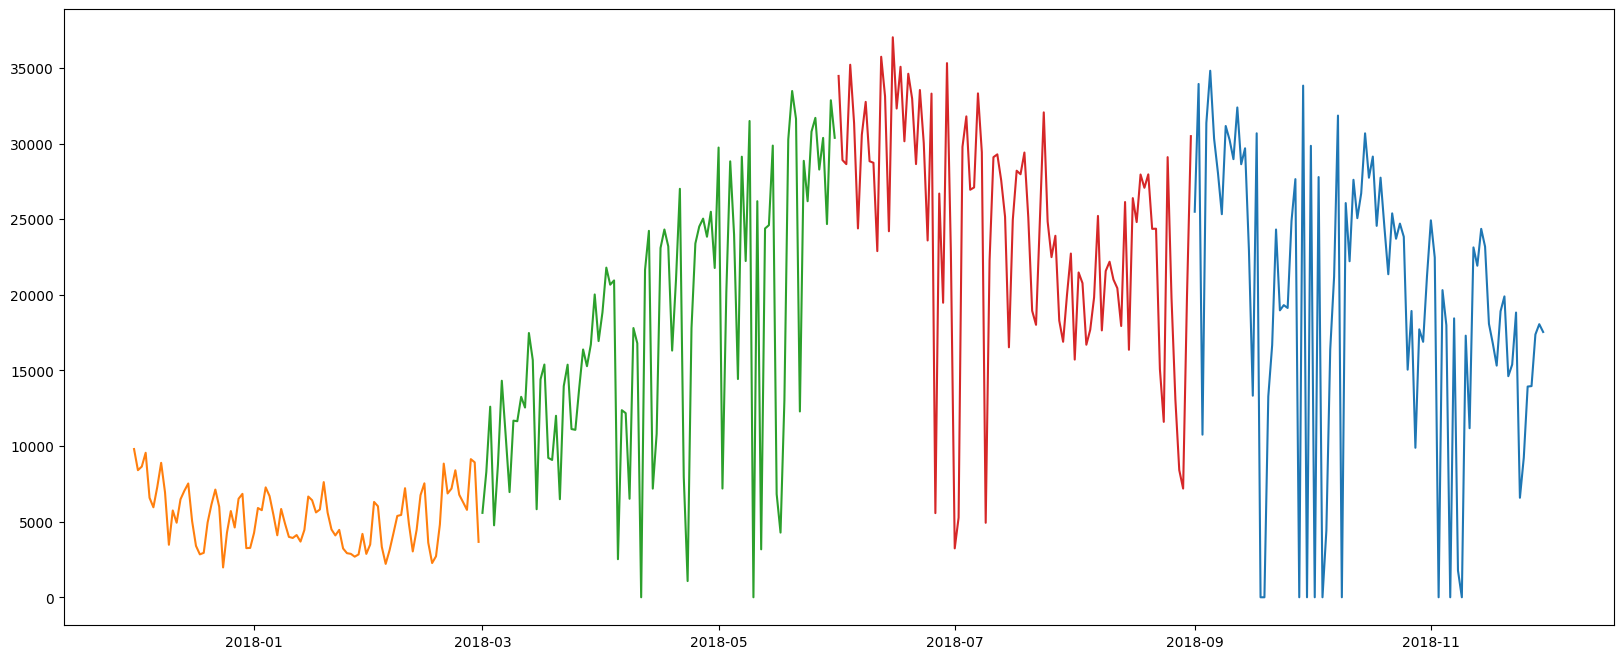

In [36]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(bikes.groupby(['Seasons', 'Date'])['Rental Count'].sum().loc['Autumn'])
ax.plot(bikes.groupby(['Seasons', 'Date'])['Rental Count'].sum().loc['Winter'])
ax.plot(bikes.groupby(['Seasons', 'Date'])['Rental Count'].sum().loc['Spring'])
ax.plot(bikes.groupby(['Seasons', 'Date'])['Rental Count'].sum().loc['Summer'])

А теперь ещё 2 графика

Удобно разбираться, что в них происходит, убирая и добавляя строки кода

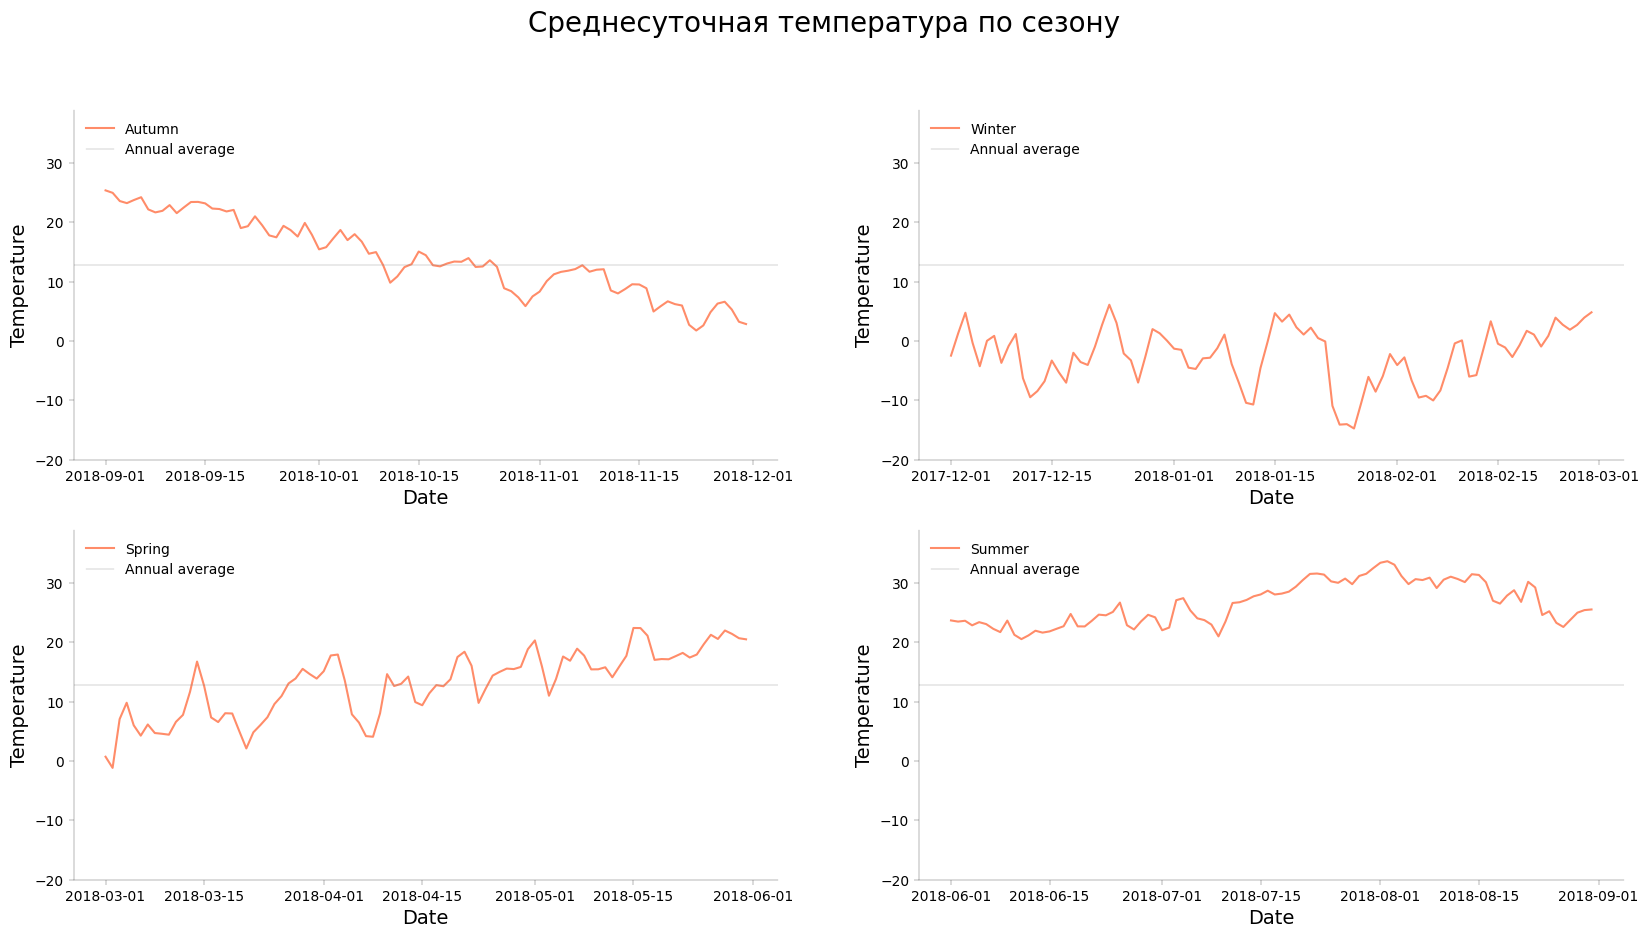

In [38]:
fig, ax = plt.subplots(2,2, figsize=(20,10))

ax[0][0].plot(bikes.groupby(['Seasons', 'Date'])['Temperature'].mean().loc['Autumn'], c='#ff8c69')
ax[0][1].plot(bikes.groupby(['Seasons', 'Date'])['Temperature'].mean().loc['Winter'], c='#ff8c69')
ax[1][0].plot(bikes.groupby(['Seasons', 'Date'])['Temperature'].mean().loc['Spring'], c='#ff8c69')
ax[1][1].plot(bikes.groupby(['Seasons', 'Date'])['Temperature'].mean().loc['Summer'], c='#ff8c69')

for axis,season in zip(ax.ravel(), ['Autumn', 'Winter', 'Spring', 'Summer']):
    axis.set_xlabel('Date', fontsize=14)
    axis.set_ylabel('Temperature', fontsize=14)
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.spines['left'].set_linewidth(0.2)
    axis.spines['bottom'].set_linewidth(0.2)
    axis.xaxis.set_tick_params(width=0.2)
    axis.yaxis.set_tick_params(width=0.2)
    axis.set_ylim(-20, 39)
    axis.axhline(12.9, c='grey', lw=0.25)
    axis.legend([season, 'Annual average'], frameon=False, loc=2)

        
fig.suptitle('Среднесуточная температура по сезону', fontsize=20)
fig.savefig('temps.pdf')
fig.savefig('temps.png', dpi=100)

In [39]:
bikes['Weekend'] = np.where(bikes['Date'].dt.day_name().isin(['Saturday', 'Sunday']) + bikes['Holiday'], 1, 0)
bikes['Rainfall and Snowfall'] = bikes['Rainfall'] * 10 + bikes['Snowfall']

In [40]:
bikes_sum = bikes.groupby('Date')['Rental Count'].sum()
temp_av = bikes.groupby('Date')['Temperature'].mean()
rainsnow_av = bikes.groupby('Date')['Rainfall and Snowfall'].mean()
weekend = bikes.groupby('Date')['Weekend'].max()

bikes_date = pd.concat([bikes_sum, temp_av, rainsnow_av, weekend], axis=1)

In [41]:
bikes_date['Rainfall and Snowfall']

Date
2017-12-01    0.000000
2017-12-02    0.000000
2017-12-03    1.666667
2017-12-04    0.041667
2017-12-05    0.000000
                ...   
2018-11-26    0.120833
2018-11-27    0.000000
2018-11-28    0.000000
2018-11-29    0.000000
2018-11-30    0.000000
Name: Rainfall and Snowfall, Length: 365, dtype: float64

Text(0, 0.5, 'Арендованные велосипеды')

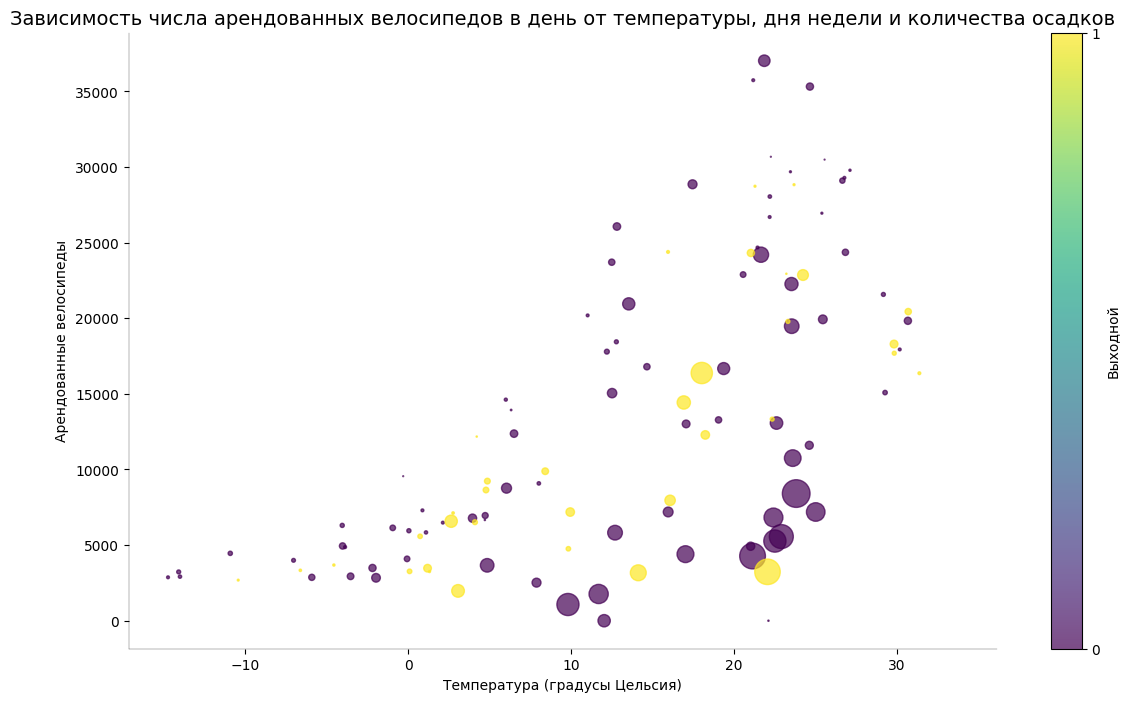

In [42]:
fig, ax = plt.subplots(figsize=(14,8))
graph = ax.scatter(bikes_date['Temperature'], bikes_date['Rental Count'], 
           c = bikes_date['Weekend'], s = bikes_date['Rainfall and Snowfall']*10, 
           alpha = 0.7)
plt.colorbar(graph, ticks=range(2), label='Выходной')

ax.set_title('Зависимость числа арендованных велосипедов в день от температуры, дня недели и количества осадков', fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(0.2)
ax.spines['bottom'].set_linewidth(0.2)
ax.set_xlabel('Температура (градусы Цельсия)', fontsize=10)
ax.set_ylabel('Арендованные велосипеды', fontsize=10)